In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/

Mounted at /content/drive
/content/drive/MyDrive


In [2]:
!ls /content/drive/MyDrive/lenia_dataset_chaotic | wc -l

71


In [3]:
# import os
# import random

# def delete_random_files(folder_path, num_files):
#     # Get a list of all the files in the folder
#     files = os.listdir(folder_path)
#     # Shuffle the list of files randomly
#     random.shuffle(files)
#     # Loop over the shuffled list and delete the first num_files files
#     for filename in files[:num_files]:
#         # Get the full path of the file
#         file_path = os.path.join(folder_path, filename)
#         # Delete the file
#         os.remove(file_path)
#         # print(f"Deleted file: {file_path}")

# # Example usage
# folder_path = "/content/drive/MyDrive/lenia_dataset"
# num_files_to_delete = 6950
# delete_random_files(folder_path, num_files_to_delete)


In [4]:
!ls /content/drive/MyDrive/lenia_dataset_chaotic | wc -l

71


In [5]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Set the path to the folder containing the images
folder_path = "/content/drive/MyDrive/lenia_dataset_chaotic/"

# Initialize lists to hold the image data and labels
data = []

# Loop over the files in the folder
for filename in os.listdir(folder_path):
    # Load the image using OpenCV
    img = cv2.imread(os.path.join(folder_path, filename))
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Resize the image to a fixed size
    resized = cv2.resize(gray, (28, 28))
    # Add the image data to the list
    data.append(resized)
    # Add the label to the list

# Convert the lists to numpy arrays
data = np.array(data)

# Split the data into training and testing sets


In [6]:
xtrain, xtest = train_test_split(data, test_size=0.3, random_state=2)


In [7]:
X_train = xtrain.reshape(xtrain.shape[0], 28, 28, 1)
X_test = xtest.reshape(xtest.shape[0], 28, 28, 1)

In [8]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.layers import Layer
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, add
from keras.layers.core import Dense, Dropout, Activation, Flatten, Reshape
from keras import regularizers
from keras.regularizers import l2
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D
from keras.utils import np_utils

In [9]:
X_train = X_train.astype("float32")/255.
X_test = X_test.astype("float32")/255.

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (49, 28, 28, 1)
49 train samples
22 test samples


In [10]:
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

In [11]:
input_size = 784
hidden_size = 64
output_size = 784

In [12]:
x = Input(shape=(input_size,))
h = Dense(hidden_size, activation='relu')(x)
r = Dense(output_size, activation='sigmoid')(h)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adam', loss='mse')

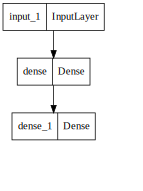

In [13]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(autoencoder).create(prog='dot', format='svg'))

In [14]:
epochs = 300
batch_size = 128

history = autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test))


Epoch 1/300
1/1 [==============================] - 1s 848ms/step - loss: 0.0543 - val_loss: 0.0541
Epoch 2/300
1/1 [==============================] - 0s 46ms/step - loss: 0.0517 - val_loss: 0.0522
Epoch 3/300
1/1 [==============================] - 0s 40ms/step - loss: 0.0498 - val_loss: 0.0503
Epoch 4/300
1/1 [==============================] - 0s 38ms/step - loss: 0.0480 - val_loss: 0.0482
Epoch 5/300
1/1 [==============================] - 0s 38ms/step - loss: 0.0459 - val_loss: 0.0458
Epoch 6/300
1/1 [==============================] - 0s 41ms/step - loss: 0.0435 - val_loss: 0.0432
Epoch 7/300
1/1 [==============================] - 0s 39ms/step - loss: 0.0410 - val_loss: 0.0405
Epoch 8/300
1/1 [==============================] - 0s 40ms/step - loss: 0.0382 - val_loss: 0.0377
Epoch 9/300
1/1 [==============================] - 0s 37ms/step - loss: 0.0355 - val_loss: 0.0348
Epoch 10/300
1/1 [==============================] - 0s 37ms/step - loss: 0.0327 - val_loss: 0.0321
Epoch 11/300
1/1 [

1/1 [==============================] - 0s 73ms/step


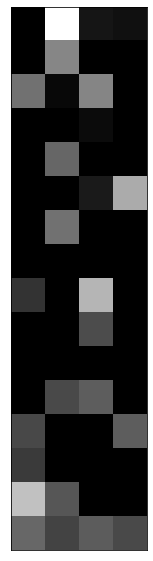

In [15]:
conv_encoder = Model(x, h)
encoded_imgs = conv_encoder.predict(X_test)

n = 1
plt.figure(figsize=(28, 10))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs[i].reshape(4, 16).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [16]:
decoded_imgs = autoencoder.predict(X_test)


1/1 [==============================] - 0s 48ms/step


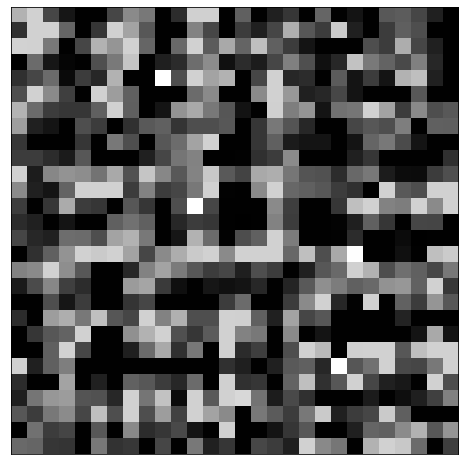

In [17]:
n = 1
plt.figure(figsize=(28, 28))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28),cmap="gist_earth")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


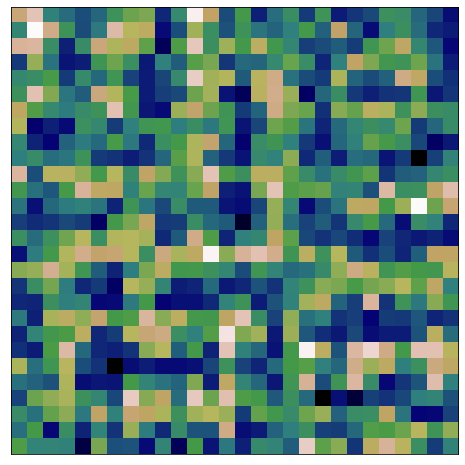

In [18]:
plt.figure(figsize=(28,28))
for i in range(n):    
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gist_earth")
    # plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

dict_keys(['loss', 'val_loss'])


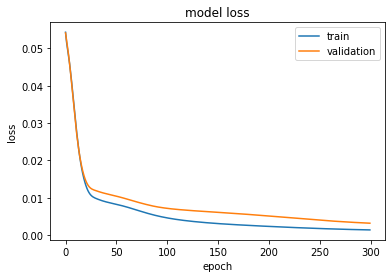

In [19]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [20]:
import tensorflow as tf

for i in range(n):
  print("Error or loss for the image "+str(i))
  print(tf.math.reduce_mean(tf.square(decoded_imgs[i].reshape(28, 28)-X_test[i].reshape(28, 28))))
  print("------------------------------------------------------------------")

Error or loss for the image 0
tf.Tensor(0.008771655, shape=(), dtype=float32)
------------------------------------------------------------------
